Лабораторна робота 8

1.Виконати вирішення задачі класифікації для 3 класів з набору даних food101 https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip . 

2.Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 , n - 3.


Обрані класи: ['baklava', 'dumplings', 'macaroni_and_cheese']
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.3130 - loss: 1.1270 - val_accuracy: 0.3333 - val_loss: 1.1204
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - accuracy: 0.3306 - loss: 1.1640 - val_accuracy: 0.3333 - val_loss: 1.1710
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3262 - loss: 1.1468 - val_accuracy: 0.3333 - val_loss: 1.0993
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.2927 - loss: 1.1004 - val_accuracy: 0.3333 - val_loss: 1.1066
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.3327 - loss: 1.1067 - val_accuracy: 0.3333 - val_loss: 1.1079
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.2830 - loss: 1.1217 - val_accuracy: 0.3333 - val_loss: 1.1030
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.3498 - loss: 1.1113 - val_accuracy: 0.3333 - val_loss: 1.1152
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.2933 - loss: 1.1475 - val_accuracy: 0.3333 - val_loss: 1.1548
Epoch 9/

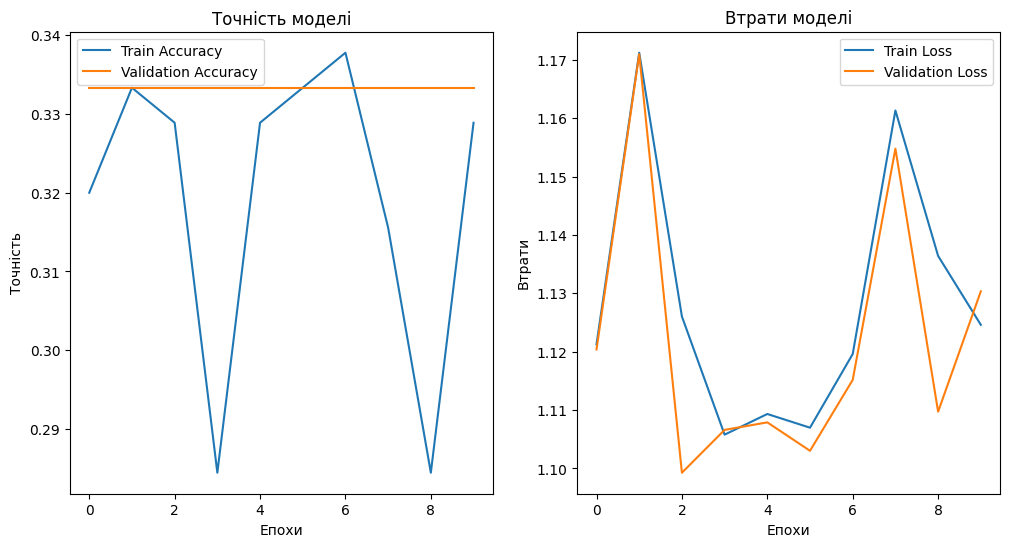

In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Шляхи до даних
base_dir = r"C:\Users\Lenovo Legion 5\Downloads\101_food_classes_10_percent\101_food_classes_10_percent"

# Індекси класів
class_indices = [2, 32, 62]

# Розмір зображення
img_size = (224, 224)

# Параметри навчання
batch_size = 32
epochs = 10
# Завантаження даних
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Фільтруємо класи
selected_classes = [d for i, d in enumerate(os.listdir(train_dir)) if i in class_indices]

# Перевірка
print("Обрані класи:", selected_classes)

# Створюємо генератори даних
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    classes=selected_classes,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    classes=selected_classes,
    batch_size=batch_size,
    class_mode='categorical'
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Заморожуємо базову модель

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(selected_classes), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)
loss, accuracy = model.evaluate(test_data)
print(f"Точність: {accuracy*100:.2f}%, Втрати: {loss:.4f}")
plt.figure(figsize=(12, 6))

# Точність
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

# Втрати
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.show()
